In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
# find current working directory using os module
os.getcwd()

'/Users/Tarek/Documents/masterRootAppFolder/EarlyDetection3DPrinterIssues'

In [3]:
DATA_PATH = '/Volumes/Photo SanDisk Pro/EarlyDetection3DPrinterIssues/early-detection-of-3d-printing-issues'
# reset path to data directory
os.chdir(DATA_PATH)

In [4]:
cwd = os.getcwd()
cwd

'/Volumes/Photo SanDisk Pro/EarlyDetection3DPrinterIssues/early-detection-of-3d-printing-issues'

In [5]:
os.listdir(cwd)

['.DS_Store', 'images', 'test.csv', 'train.csv', 'sample_submission.csv']

In [124]:
# load train & test dataset into a dataframes
train_df, test_df = pd.read_csv('./train.csv'), pd.read_csv('./test.csv')

In [7]:
train_df.head()

,img_path,printer_id,print_id,has_under_extrusion
0,101/1678589738/1678589914.060332.jpg,101,1678589738,1
1,101/1678589738/1678589914.462857.jpg,101,1678589738,1
2,101/1678589738/1678589914.875075.jpg,101,1678589738,1
3,101/1678589738/1678589915.284495.jpg,101,1678589738,1
4,101/1678589738/1678589915.700486.jpg,101,1678589738,1


In [126]:
test_df.head()

,img_path,printer_id,print_id
0,101/1678578332/1678578538.704966.jpg,101,1678578332
1,101/1678578332/1678578539.108019.jpg,101,1678578332
2,101/1678578332/1678578539.512872.jpg,101,1678578332
3,101/1678578332/1678578539.916711.jpg,101,1678578332
4,101/1678578332/1678578540.329089.jpg,101,1678578332


In [127]:
np.unique(train_df['printer_id']), np.unique(test_df['printer_id'])

(array([ 22, 101, 102, 103, 104]), array([ 21,  22,  23, 101, 102, 103, 104]))

In [128]:
# view size of dataframes
train_df.shape, test_df.shape

((81060, 4), (25279, 3))

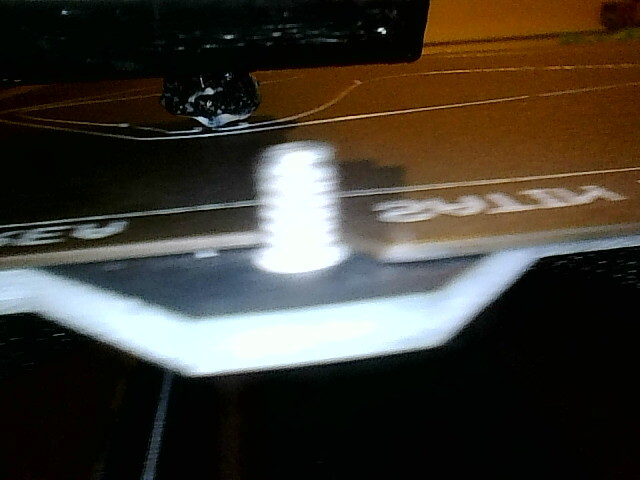

In [10]:
# render the first image of the train dataset
train_image = Image.open('./images/' + train_df['img_path'][0])
train_image

In [130]:
# create a function to render a train image from dataframe
def render_image(index, train=True):
        if train:
                image = Image.open('./images/' + train_df['img_path'][index])
        else:
                image = Image.open('./images/' + test_df['img_path'][index])
        return image

In [131]:
# create a function to transform jpg train image to a numpy array
def image_to_array(index, train=True):
        if train:
                image = Image.open('./images/' + train_df['img_path'][index])
        else:
                image = Image.open('./images/' + test_df['img_path'][index])
        image_array = np.array(image)
        return image_array

In [132]:
image_1_array = image_to_array(0, train=True)
image_1_array.shape

(480, 640, 3)

In [133]:
# calculate how much memory a single image array takes up
image_1_array.nbytes

921600

In [183]:
# create an array of unique printer_ids and print_id from the train dataset
train_printer_print_id_df, test_printer_print_id_df = train_df[['printer_id', 'print_id']].drop(0), test_df[['printer_id', 'print_id']].drop(0)

In [184]:
# generate list of unique printer_id and print_id pairs
train_printer_print_id_list, test_printer_print_id_list = train_printer_print_id_df.values, test_printer_print_id_df.values

In [185]:
train_printer_print_id_list.shape, test_printer_print_id_list.shape

((81059, 2), (25278, 2))

In [186]:
train_unique_printer_print_id_list, test_unique_printer_print_id_list = np.unique(train_printer_print_id_list, axis=0), np.unique(test_printer_print_id_list, axis=0)
train_unique_printer_print_id_list.shape, test_unique_printer_print_id_list.shape

((52, 2), (44, 2))

In [138]:
train_unique_printer_print_id_list[0:2]

array([[        22, 1672709609],
       [        22, 1672767789]])

In [187]:
test_unique_printer_print_id_list[0:2]

array([[        21, 1673025450],
       [        21, 1673031848]])

In [188]:
def list_printer_print_images(printer_id, print_id, train=True):
        if train:
                printer_print_images = train_df.loc[(train_df['printer_id'] == printer_id) & (train_df['print_id'] == print_id)]
                return np.array(printer_print_images[['img_path', 'has_under_extrusion']])
        else:
                printer_print_images = test_df.loc[(test_df['printer_id'] == printer_id) & (test_df['print_id'] == print_id)]
                return np.array(printer_print_images[['img_path']])        

In [141]:
first_pair = train_unique_printer_print_id_list[0]
printer_id, print_id = first_pair[0], first_pair[1]
first_pair_img_paths = list_printer_print_images(printer_id, print_id, train=True)
first_pair_img_paths.shape

(307, 2)

In [200]:
# Create a function to save a list of images to a single .npy file
def save_images_to_npy(img_paths, printer_id, flatten=True, train=True):
        img_array_list = []
        img_label_list = []
        if train:
                for img_path in img_paths:
                        img, img_label = Image.open('./images/' + img_path[0]), img_path[1]
                        img_array = np.array(img).flatten() if flatten else np.array(img)
                        img_array_list.append(img_array)
                        img_label_list.append(img_label)
                img_array_list = np.array(img_array_list)
                img_label_list = np.array(img_label_list)
                np.save('./images/train_arrays/printer_id_' + str(printer_id) + '.npy', img_array_list)
                np.save('./images/train_arrays/printer_id_' + str(printer_id) + '_label' + '.npy', img_label_list)
        else:
                for img_path in img_paths:
                        img = Image.open('./images/' + img_path[0])
                        img_array = np.array(img).flatten() if flatten else np.array(img)
                        img_array_list.append(img_array)
                img_array_list = np.array(img_array_list)
                np.save('./images/test_arrays/printer_id_' + str(printer_id) + '.npy', img_array_list)
        del img_array_list, img_label_list

In [143]:
save_images_to_npy(first_pair_img_paths, printer_id, flatten=False, train=True)

In [201]:
# Create a function to read .npy file and return a numpy array
def read_npy_file(printer_id, train=True):
        if train:
                img_array = np.load('./images/train_arrays/printer_id_' + str(printer_id) + '.npy')
                img_array_label = np.load('./images/train_arrays/printer_id_' + str(printer_id) + '_label' + '.npy')
                return img_array, img_array_label
        else:
                img_array = np.load('./images/test_arrays/printer_id_' + str(printer_id) + '.npy')
                return img_array

In [145]:
train_images_22, train_images_22_label = read_npy_file(22, train=True)

In [146]:
train_images_22.shape, train_images_22_label.shape

((307, 720, 1280, 3), (307,))

In [147]:
# Flatten the first image array of train_images_22
flat_img_array_ex = train_images_22[0].flatten()
flat_img_array_ex.shape

(2764800,)

In [148]:
# Convert flattened image array, flat_img_array_ex, back to original dimension
reshaped_flat_img = flat_img_array_ex.reshape(720, 1280, 3)
reshaped_flat_img.shape

(720, 1280, 3)

In [149]:
# Create a function to convert numpy array to image and view image
def array_to_image(img_array):
        img = Image.fromarray(img_array)
        print(img)
        return img

<ipython-input-150-36ea307eab8e>:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


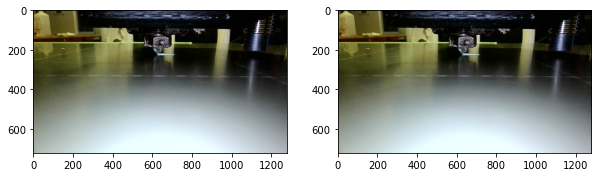

In [150]:
# Create 1x2 PIL image, first image is train_images_22[0], second image is reshaped_flat_img
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(train_images_22[0])
ax[1].imshow(reshaped_flat_img)
fig.show()

In [110]:
save_images_to_npy(first_pair_img_paths, printer_id, flatten=True, train=True)

In [111]:
train_images_22_flat, train_images_22_flat_label = read_npy_file(22, train=True)

In [112]:
train_images_22_flat.shape, train_images_22_flat_label.shape

((307, 2764800), (307,))

<ipython-input-120-72e3992e048e>:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


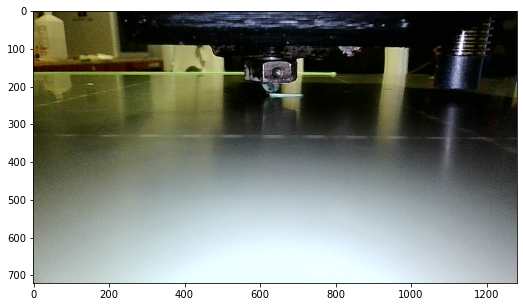

In [120]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.imshow(train_images_22_flat[0].reshape(720, 1280, 3))
fig.show()

In [202]:
# Create a function to save all images in the train dataset to .npy files
def save_all_images_to_npy(flatten=True, train=True):
        if train:
                for pair in train_unique_printer_print_id_list:
                        printer_id, print_id = pair[0], pair[1]
                        img_paths = list_printer_print_images(printer_id, print_id, train=train)
                        save_images_to_npy(img_paths, printer_id, flatten=flatten, train=train)
        else:
                for pair in test_unique_printer_print_id_list:
                        printer_id, print_id = pair[0], pair[1]
                        img_paths = list_printer_print_images(printer_id, print_id, train=train)
                        save_images_to_npy(img_paths, printer_id, flatten=flatten, train=train)

In [203]:
# Create a function to read all .npy files in the train dataset and return a numpy array
def read_all_images_from_npy(train=True):
        images = []
        images_label = []
        if train:
                for pair in train_unique_printer_print_id_list:
                        printer_id, print_id = pair[0], pair[1]
                        img_array, img_array_label = read_npy_file(printer_id, train=train)
                        images.append(img_array)
                        images_label.append(img_array_label)
                images = np.array(images)
                images_label = np.array(images_label)
                return images, images_label
        else:
                for pair in test_unique_printer_print_id_list:
                        printer_id, print_id = pair[0], pair[1]
                        img_array = read_npy_file(printer_id, train=train)
                        images.append(img_array)
                images = np.array(images)
                return images

In [154]:
save_all_images_to_npy(flatten=True, train=True)

In [204]:
save_all_images_to_npy(flatten=True, train=False)

In [206]:
test_images_22 = read_npy_file(22, train=False)

In [207]:
test_images_22.shape

(621, 2764800)

<ipython-input-208-1879cdd198e5>:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


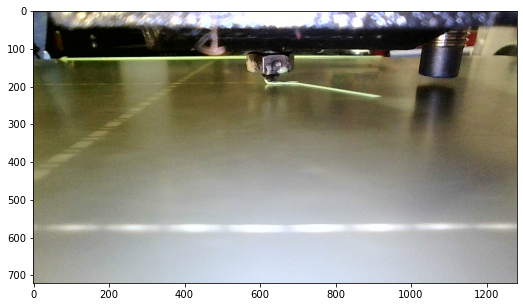

In [208]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.imshow(test_images_22[0].reshape(720, 1280, 3))
fig.show()

In [13]:
train_image_arrays = []
unique_train_images_shapes = []

In [14]:
# loop through each image in train dataset and check if the numpy shape are the same
for i in range(0, len(train_df)):
        image_array = train_image_to_array(i)
        train_image_arrays.append(image_array)
        if image_array.shape != image_1_array.shape:
                print(f'Image shape is not {image_1_array.shape} at index: ', i)
                unique_train_images_shapes.append(i)